In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

In [12]:
from tensorflow.keras.models import load_model

model = load_model('../models/model_X.keras')

In [13]:
input_shape = (256, 256, 3)

def predict_image(model, image_path):
    image = Image.open(image_path).convert('RGB').resize(input_shape[:2])
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    mask = model.predict(image_array)
    return mask

image_path = '../Example/U-net/images_val/frankfurt_000001_031416.png'
image_path = '../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png'
predicted_mask = predict_image(model, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


In [14]:
mask1 = predicted_mask[0].copy()
segmentation_map = np.argmax(mask1, axis=-1)
tableau_transforme = np.expand_dims(segmentation_map, axis=-1)
first_mask_array = np.uint8(tableau_transforme)
transformed_array = np.repeat(first_mask_array, 3, axis=2)
for x in range(transformed_array.shape[0]):
    for y in range(transformed_array.shape[1]):
        if (transformed_array[x, y] == [0, 0, 0]).all():
            transformed_array[x, y] = [250, 170, 30]
        elif (transformed_array[x, y] == [1, 1, 1]).all():
            transformed_array[x, y] = [0, 0, 142]
        elif (transformed_array[x, y] == [2, 2, 2]).all():
            transformed_array[x, y] = [102, 102, 156]
        elif (transformed_array[x, y] == [3, 3, 3]).all():
            transformed_array[x, y] = [220, 20, 60]
        elif (transformed_array[x, y] == [4, 4, 4]).all():
            transformed_array[x, y] = [153, 153, 153]
        elif (transformed_array[x, y] == [5, 5, 5]).all():
            transformed_array[x, y] = [244, 35, 232]
        elif (transformed_array[x, y] == [6, 6, 6]).all():
            transformed_array[x, y] = [70, 70, 70]
        elif (transformed_array[x, y] == [7, 7, 7]).all():
            transformed_array[x, y] = [70, 130, 180]

In [15]:
pil_mask = Image.fromarray(transformed_array)
pil_mask = pil_mask.resize((2048, 1024))

In [16]:
pil_mask = pil_mask.convert("RGBA")
transparency = 128
mask_data = [(r, g, b, transparency) for r, g, b, _ in pil_mask.getdata()]
pil_mask.putdata(mask_data)

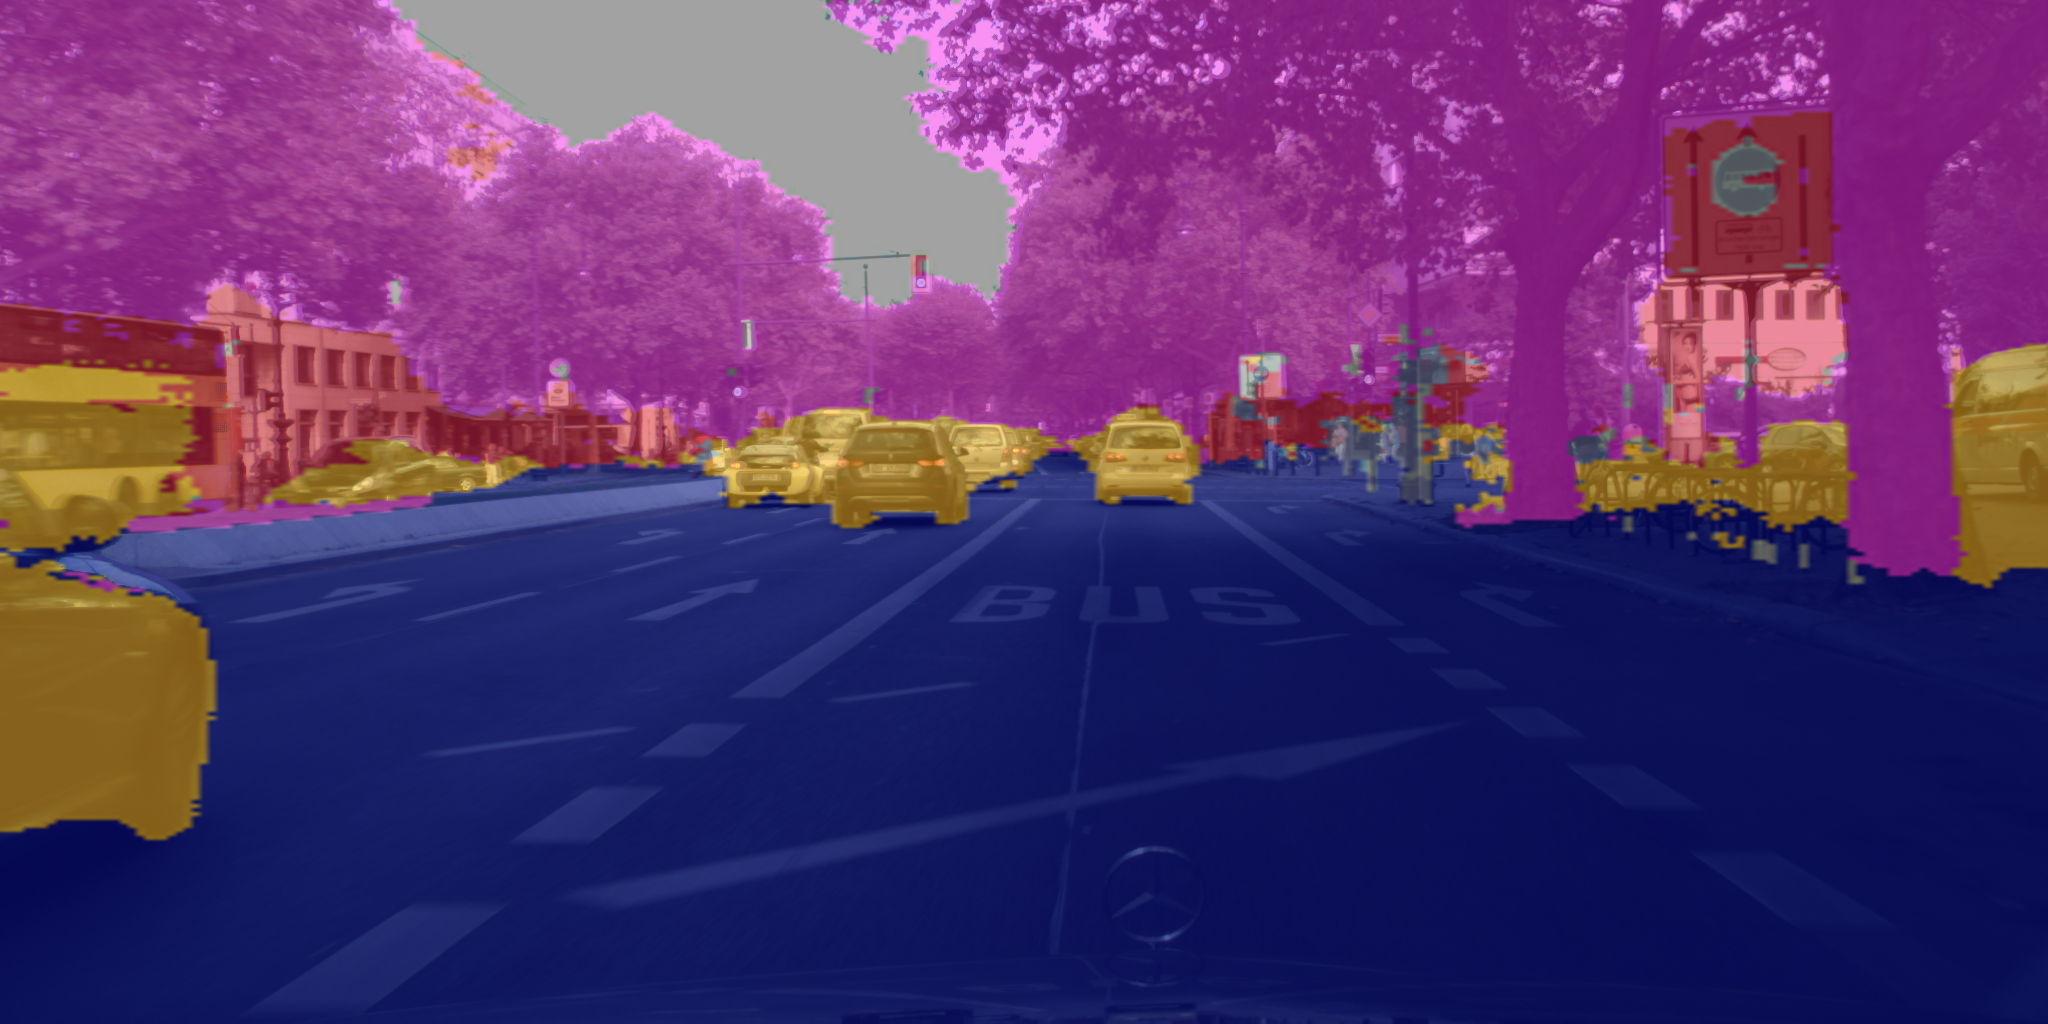

In [17]:
test1 = Image.open(image_path)
test1.paste(pil_mask, (0, 0), pil_mask)
test1